In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [67]:
df = pd.read_csv('dataset.csv')

In [68]:
df.columns

Index(['Unnamed: 0', 'Store Name', 'Clasificación Store Optimizer', 'Value',
       'Venta_2019', 'Venta_2020', 'Data Type', 'Macroformato', 'Categoría',
       'Estado', 'MG', 'Región Nestlé', 'Growth', 'CSO'],
      dtype='object')

In [69]:
df = df.drop(['Unnamed: 0'], axis=1)

In [70]:
data = df[['Venta_2020','Venta_2019','Growth', 'CSO']]

In [71]:
data = data.fillna(0)

In [72]:
label = df['Región Nestlé']

In [73]:
label[:5]

0    Anahuac
1    Anahuac
2    Anahuac
3    Anahuac
4    Anahuac
Name: Región Nestlé, dtype: object

In [74]:
label_encoder = LabelEncoder()

true_labels = label_encoder.fit_transform(label)

true_labels[:5]

array([1, 1, 1, 1, 1])

In [75]:
label_encoder.classes_

array(['#N/D', 'Anahuac', 'Nacional', 'Norte', 'Occidente', 'Pacifico',
       'Sureste', 'Valle De Mexico'], dtype=object)

In [76]:
n_clusters = len(label_encoder.classes_)

In [77]:
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=3, random_state=42)),
    ]
)

In [78]:
clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=n_clusters,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)

In [79]:
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

In [80]:
pipe.fit(data)

Pipeline(memory=None,
         steps=[('preprocessor',
                 Pipeline(memory=None,
                          steps=[('scaler',
                                  MinMaxScaler(copy=True,
                                               feature_range=(0, 1))),
                                 ('pca',
                                  PCA(copy=True, iterated_power='auto',
                                      n_components=3, random_state=42,
                                      svd_solver='auto', tol=0.0,
                                      whiten=False))],
                          verbose=False)),
                ('clusterer',
                 Pipeline(memory=None,
                          steps=[('kmeans',
                                  KMeans(algorithm='auto', copy_x=True,
                                         init='k-means++', max_iter=500,
                                         n_clusters=8, n_init=50, n_jobs=None,
                                         precomp

In [81]:
preprocessed_data = pipe["preprocessor"].transform(data)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

silhouette_score(preprocessed_data, predicted_labels)

0.9416958953144758

In [82]:
adjusted_rand_score(true_labels, predicted_labels)

-0.000635689424740561

In [83]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(data),
    columns=["component_1", "component_2", "component_3"],
)

In [84]:
pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

In [85]:
num_clusters = len(pcadf['predicted_cluster'].unique())

In [86]:
pcadf

,component_1,component_2,component_3,predicted_cluster,true_label
0,-0.001990,0.000045,2.263272e-17,0,Anahuac
1,-0.001979,-0.000026,1.585646e-17,0,Anahuac
2,-0.001501,-0.001759,1.192622e-18,0,Anahuac
3,-0.001993,0.000033,1.040834e-17,0,Anahuac
4,-0.001978,-0.000022,1.062518e-17,0,Anahuac
...,...,...,...,...,...
53026,-0.001145,-0.000323,9.839135e-18,0,Valle De Mexico
53027,-0.001090,-0.000069,1.833657e-17,0,Valle De Mexico
53028,0.013288,0.000871,-6.657001e-17,0,Valle De Mexico
53029,-0.001987,0.000051,2.981556e-18,0,Valle De Mexico


In [87]:
labels = list(range(0,num_clusters))
labels

[0, 1, 2, 3, 4, 5, 6, 7]

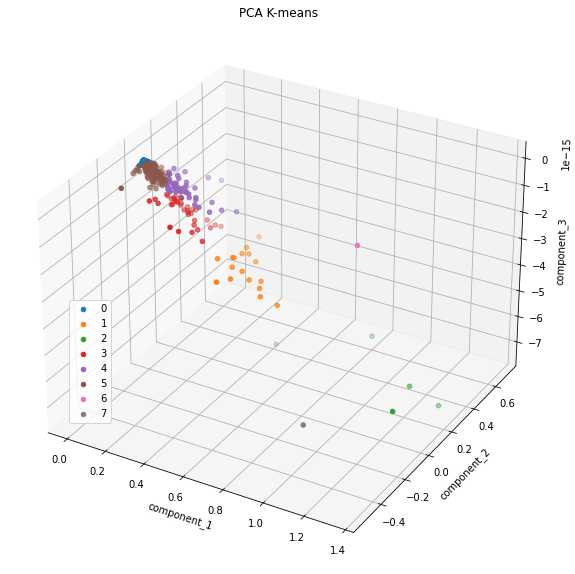

In [90]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.set_title('PCA K-means')
ax.set_xlabel('component_1')
ax.set_ylabel('component_2')
ax.set_zlabel('component_3', rotation=90)

labels = list(range(0,num_clusters))
colors = plt.cm.CMRmap(np.linspace(0, 1, num_clusters))
axs = []

for i in labels:
    d = pcadf[pcadf['predicted_cluster']==i]
    axs.append(ax.scatter(d['component_1'], d['component_2'], d['component_3'], cmap=colors[i]))
    ax.legend(axs, labels, bbox_to_anchor=(0.2, 0.5), ncol=1)
    
plt.show()

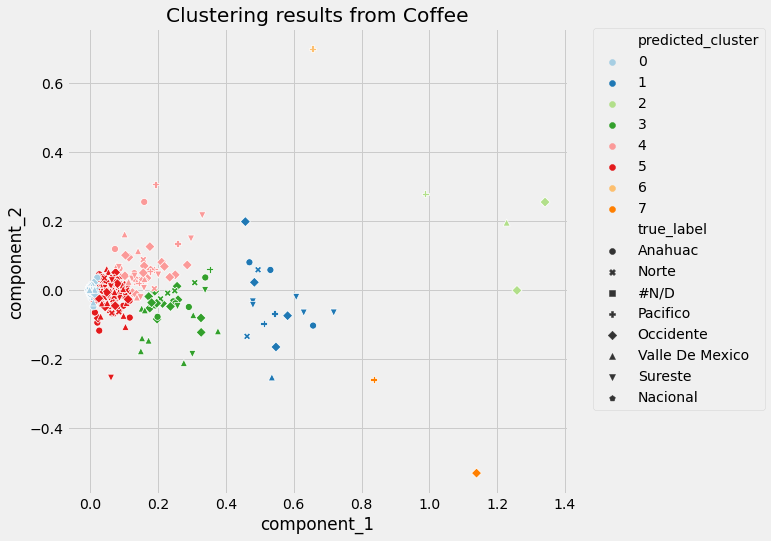

In [127]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(data),
    columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_
pcadf["true_label"] = label_encoder.inverse_transform(true_labels)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
    "component_1",
    "component_2",
    s=50,
    data=pcadf,
    hue="predicted_cluster",
    style="true_label",
    palette="Paired",
)

scat.set_title(
    "Clustering results from Coffee"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()